## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
img = plt.imread('./elephant.jpg')

In [64]:
img.shape

(330, 500, 3)

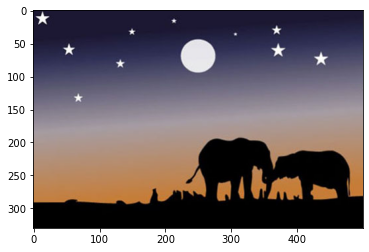

In [65]:
plt.imshow(img)

In [66]:
img = img.reshape(-1, 3)

In [67]:
img.shape

(165000, 3)

In [68]:
img[:5]

array([[23, 19, 46],
       [25, 21, 48],
       [28, 24, 51],
       [29, 25, 52],
       [28, 24, 51]], dtype=uint8)

In [69]:
from sklearn.cluster import KMeans

In [70]:
km = KMeans(n_clusters=2)

In [71]:
km.fit(img)

KMeans(n_clusters=2)

In [74]:
# approx most dominating color
centers = km.cluster_centers_.astype('int')

In [75]:
centers

array([[154, 132, 126],
       [ 23,  21,  37]])

#### Plot what all colors??

In [76]:
arr = np.zeros((50,50,3), dtype="int")

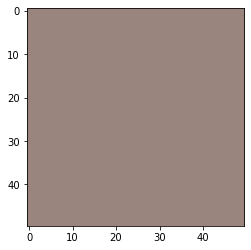

In [77]:
arr[:, :,:] = centers[0]
plt.imshow(arr)

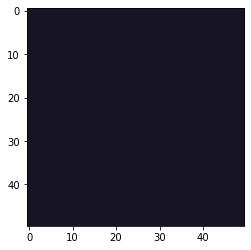

In [78]:
arr[:, :,:] = centers[1]
plt.imshow(arr)

In [79]:
# arr[:, :,:] = centers[2]
# plt.imshow(arr)

### Perform Segmentation

In [86]:
km.labels_[:-50]

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [87]:
km.labels_.shape

(165000,)

In [88]:
np.unique(km.labels_)

array([0, 1], dtype=int32)

In [89]:
# Creating New image
new_img = np.zeros((330*500, 3), dtype='int')

In [90]:
new_img.shape

(165000, 3)

In [91]:
for i in range(img.shape[0]):
    new_img[i] = centers[km.labels_[i]]

In [93]:
compressed_img = new_img.reshape(330,500,3)

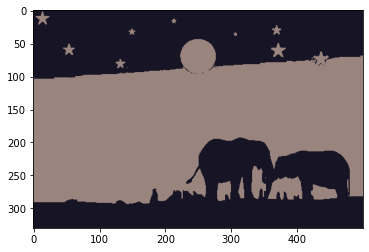

In [94]:
plt.imshow(compressed_img)
plt.show()